In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm


%matplotlib inline

In [3]:
data = pd.read_csv('data_to_model.csv')


In [4]:
data = data.set_index('Accident_Index')


In [5]:
data = data.drop(['Location_Easting_OSGR','Location_Northing_OSGR', '2nd_Road_Class',
                  'Latitude', 'Longitude'], axis = 1)

In [6]:
#considering all vars


discrete_columns = ['Age_Band_of_Driver', 'include_pedestrian',   'Day_of_Week',
                    '1st_Road_Class', 'Road_Type', 'Speed_limit',
                     'Urban_or_Rural_Area',
                     'weekdays', 
                    'Casualty_IMD_Group', 'Driver_IMD_Group', 'Vehicle_Age_Group',
                    'Number_Vehicles_Group', 'Number_Casualties_Group', 'Junction_Group',
                    'Pedestrian_Control', 'Pedestrian_PhisFac', 'Active_Light', 'Weather',
                    'Road_Surf_Cond', 'Special_Conds', 'Carriageway_Haz', 'Commute_hours']

continuous_columns = []#['Longitude', 'Latitude']#, '1st_Road_Number', '2nd_Road_Number']







#get_dummies for cat_vars

dummy_Casualty_IMD_Group = pd.get_dummies(data['Casualty_IMD_Group'], prefix='Casualty_IMD_Group')
dummy_Age_Band_of_Driver = pd.get_dummies(data['Age_Band_of_Driver'], prefix='Age_Band_of_Driver')
dummy_Driver_IMD_Group = pd.get_dummies(data['Driver_IMD_Group'], prefix='Driver_IMD_Group')
dummy_include_pedestrian = pd.get_dummies(data['include_pedestrian'], prefix='include_pedestrian')
dummy_Day_of_Week = pd.get_dummies(data['Day_of_Week'], prefix='Day_of_Week')

dummy_1st_Road_Class = pd.get_dummies(data['1st_Road_Class'], prefix='1st_Road_Class')
dummy_Road_Type = pd.get_dummies(data['Road_Type'], prefix='Road_Type')
dummy_Speed_limit = pd.get_dummies(data['Speed_limit'], prefix='Speed_limit')
dummy_Urban_or_Rural_Area = pd.get_dummies(data['Urban_or_Rural_Area'], prefix='Urban_or_Rural_Area')
dummy_weekdays = pd.get_dummies(data['weekdays'], prefix='weekdays')

dummy_Vehicle_Age_Group = pd.get_dummies(data['Vehicle_Age_Group'], prefix='Vehicle_Age_Group')
dummy_Number_Vehicles_Group = pd.get_dummies(data['Number_Vehicles_Group'], prefix='Number_Vehicles_Group')
dummy_Number_Casualties_Group = pd.get_dummies(data['Number_Casualties_Group'], prefix='Number_Casualties_Group')
dummy_Junction_Group = pd.get_dummies(data['Junction_Group'], prefix='Junction_Group')
dummy_Pedestrian_Control = pd.get_dummies(data['Pedestrian_Control'], prefix='Pedestrian_Control')
dummy_Pedestrian_PhisFac = pd.get_dummies(data['Pedestrian_PhisFac'], prefix='Pedestrian_PhisFac')

dummy_Active_Light = pd.get_dummies(data['Active_Light'], prefix='Active_Light')
dummy_Weather = pd.get_dummies(data['Weather'], prefix='Weather')
dummy_Road_Surf_Cond = pd.get_dummies(data['Road_Surf_Cond'], prefix='Road_Surf_Cond')
dummy_Special_Conds = pd.get_dummies(data['Special_Conds'], prefix='Special_Conds')
dummy_Carriageway_Haz = pd.get_dummies(data['Carriageway_Haz'], prefix='Carriageway_Haz')
dummy_Commute_hours = pd.get_dummies(data['Commute_hours'], prefix='Commute_hours')





continuous = data[continuous_columns]
data_new = pd.concat([dummy_Casualty_IMD_Group,dummy_Age_Band_of_Driver,dummy_Driver_IMD_Group,
                    dummy_include_pedestrian,  dummy_Day_of_Week,
                    dummy_1st_Road_Class, dummy_Road_Type, dummy_Speed_limit, dummy_Urban_or_Rural_Area,
                      dummy_weekdays, dummy_Vehicle_Age_Group,
                    dummy_Number_Vehicles_Group, dummy_Number_Casualties_Group, dummy_Junction_Group,
                    dummy_Pedestrian_Control, dummy_Pedestrian_PhisFac, dummy_Active_Light, dummy_Weather,
                    dummy_Road_Surf_Cond, dummy_Special_Conds, dummy_Carriageway_Haz,
                      dummy_Commute_hours,continuous,data['Class']],axis=1)

x_train,x_test,y_train,y_test = train_test_split(data_new.drop(['Class'],axis=1),data_new['Class'],
                                                 train_size = 0.7,test_size = 0.3, 
                                                 random_state=42)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


In [7]:
#0.82858 is proportion betwwen bad and good accidents at the beginning 
proportion_bad = data[data.Class == 1].shape[0]/data.shape[0]
proportion_good = 1 - proportion_bad
proportion_bad

0.16519310708724244

In [8]:
data_new_sample = data_new.sample(frac = 0.1, replace=False)
proportion_bad = data_new_sample[data_new_sample.Class == 1].shape[0]/data_new_sample.shape[0]
proportion_bad

0.16898326898326899

# resampling training set to 50/50

In [18]:
data_new_sample_train_bad = data_new[data_new['Class'] == 1].sample(frac = 2.5*0.085, replace = False)
data_new_sample_train_good = data_new[data_new['Class'] == 0].sample(frac = 2.5*0.015, replace = False)
data_train = pd.concat([data_new_sample_train_bad, data_new_sample_train_good])
data_train = data_train.sample(frac=1).reset_index(drop=True)

In [19]:
print(data_new_sample_train_bad.shape)
print(data_new_sample_train_good.shape)
print(data_train.shape)

(3273, 81)
(1946, 81)
(5219, 81)


In [20]:

data_test = data_new.sample(frac=0.05, replace = True)
x_train = data_train.drop('Class', axis =1)
y_train = data_train['Class']
x_test = data_test.drop('Class', axis =1)
y_test = data_test['Class']

In [21]:
#data_new = data_new_sample

In [22]:
#x_train,x_test,y_train,y_test = train_test_split(data_new.drop(['Class'],axis=1),data_new['Class'],train_size = 0.7,test_size = 0.3, random_state=42)
           

rf_fit = RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=100,min_samples_split=3,
                                min_samples_leaf=2)
rf_fit.fit(x_train,y_train)           

print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit.predict(x_train),
                                                                  rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit.predict(x_test),
                                                                   rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))


Random Forest - Train Confusion Matrix

 Predicted     0     1
Actual               
0          1512   434
1            50  3223

Random Forest - Train accuracy 0.907


Random Forest - Test Confusion Matrix

 Predicted     0     1
Actual               
0          1056  2167
1            59   603

Random Forest - Test accuracy 0.427


In [23]:
# Grid Search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

pipeline = Pipeline([
        ('clf',RandomForestClassifier(criterion='gini'))  ])

parameters = {
        'clf__n_estimators':(1000,2000,3000),
        'clf__max_depth':(50,100,200),
        'clf__min_samples_split':(2,3),
        'clf__min_samples_leaf':(1,2)  }

grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)


print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(x_test)

print ("Testing accuracy:",round(accuracy_score(y_test, predictions),4))
print ("\nComplete report of Testing data\n",classification_report(y_test, predictions))

print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n",
       pd.crosstab(y_test, predictions,rownames = ["Actual"],colnames = ["Predicted"]))      



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 44.9min finished


Best Training score: 0.646
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 2
	clf__min_samples_split: 2
	clf__n_estimators: 2000
Testing accuracy: 0.426

Complete report of Testing data
               precision    recall  f1-score   support

           0       0.95      0.33      0.49      3223
           1       0.22      0.91      0.35       662

   micro avg       0.43      0.43      0.43      3885
   macro avg       0.58      0.62      0.42      3885
weighted avg       0.82      0.43      0.46      3885



Random Forest Grid Search- Test Confusion Matrix

 Predicted     0     1
Actual               
0          1054  2169
1            61   601


In [26]:
# Variable Importance chart
import matplotlib.pyplot as plt
rf_fit = RandomForestClassifier(n_estimators=2000,criterion="gini",
                                max_depth=50,min_samples_split=2,min_samples_leaf=2)
rf_fit.fit(x_train,y_train)   

importances = rf_fit.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_fit.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

colnames = list(x_train.columns)
# Print the feature ranking
print("\nFeature ranking:\n")
for f in range(x_train.shape[1]):
    print ("Feature",indices[f],",",colnames[indices[f]],round(importances[indices[f]],4))


Feature ranking:

Feature 53 , Number_Vehicles_Group_1 0.0269
Feature 40 , Speed_limit_30.0 0.0238
Feature 52 , Vehicle_Age_Group_5-10 0.0233
Feature 29 , 1st_Road_Class_3 0.0233
Feature 8 , Age_Band_of_Driver_6.0 0.0231
Feature 51 , Vehicle_Age_Group_10-15 0.0224
Feature 54 , Number_Vehicles_Group_2 0.0223
Feature 50 , Vehicle_Age_Group_0-5 0.0218
Feature 57 , Number_Casualties_Group_1 0.0213
Feature 61 , Junction_Group_1 0.0204
Feature 32 , 1st_Road_Class_6 0.0203
Feature 17 , Driver_IMD_Group_med_low 0.0193
Feature 10 , Age_Band_of_Driver_8.0 0.0193
Feature 3 , Casualty_IMD_Group_med_low 0.019
Feature 78 , Commute_hours_0 0.0183
Feature 79 , Commute_hours_1 0.0182
Feature 9 , Age_Band_of_Driver_7.0 0.018
Feature 25 , Day_of_Week_6 0.0178
Feature 63 , Junction_Group_3 0.0175
Feature 15 , Driver_IMD_Group_low 0.0175
Feature 1 , Casualty_IMD_Group_low 0.0173
Feature 24 , Day_of_Week_5 0.017
Feature 73 , Road_Surf_Cond_1 0.0169
Feature 72 , Road_Surf_Cond_0 0.0169
Feature 23 , Day_of_W

In [27]:
#x_train,x_test,y_train,y_test = train_test_split(data_new.drop(['Class'],axis=1),data_new['Class']
#                                                 ,train_size = 0.7,test_size = 0.3, random_state=42)
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=2,random_state=42)
dt_fit.fit(x_train,y_train)

print ("\nDecision Tree - Train Confusion Matrix\n\n",pd.crosstab(y_train,dt_fit.predict(x_train),
                                                                  rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nDecision Tree - Train accuracy:",round(accuracy_score(y_train,dt_fit.predict(x_train)),3))
print ("\nDecision Tree - Train Classification Report\n",classification_report(y_train,dt_fit.predict(x_train)))

print ("\n\nDecision Tree - Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict(x_test),
                                                                   rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nDecision Tree - Test accuracy:",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
print ("\nDecision Tree - Test Classification Report\n",classification_report(y_test,dt_fit.predict(x_test)))


Decision Tree - Train Confusion Matrix

 Predicted    0     1
Actual              
0          892  1054
1          743  2530

Decision Tree - Train accuracy: 0.656

Decision Tree - Train Classification Report
               precision    recall  f1-score   support

           0       0.55      0.46      0.50      1946
           1       0.71      0.77      0.74      3273

   micro avg       0.66      0.66      0.66      5219
   macro avg       0.63      0.62      0.62      5219
weighted avg       0.65      0.66      0.65      5219



Decision Tree - Test Confusion Matrix

 Predicted     0     1
Actual               
0          1448  1775
1           135   527

Decision Tree - Test accuracy: 0.508

Decision Tree - Test Classification Report
               precision    recall  f1-score   support

           0       0.91      0.45      0.60      3223
           1       0.23      0.80      0.36       662

   micro avg       0.51      0.51      0.51      3885
   macro avg       0.57      0.

In [28]:
# Tuning class weights to analyze accuracy, precision & recall
dummyarray = np.empty((6,10))
dt_wttune = pd.DataFrame(dummyarray)

dt_wttune.columns = ["zero_wght","one_wght","tr_accuracy","tst_accuracy","prec_zero","prec_one",
                     "prec_ovll","recl_zero","recl_one","recl_ovll"]

zero_clwghts = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7]

#for each combo of weight-class
for i in range(len(zero_clwghts)):
    #dictionary considering class-weights zero or one
    clwght = {0:zero_clwghts[i],1:1.0-zero_clwghts[i]}
    dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,
                                    min_samples_leaf=2,random_state=42,class_weight = clwght)
    dt_fit.fit(x_train,y_train)
    dt_wttune.loc[i, 'zero_wght'] = clwght[0]       
    dt_wttune.loc[i, 'one_wght'] = clwght[1]     
    dt_wttune.loc[i, 'tr_accuracy'] = round(accuracy_score(y_train,dt_fit.predict(x_train)),3)    
    dt_wttune.loc[i, 'tst_accuracy'] = round(accuracy_score(y_test,dt_fit.predict(x_test)),3)    
        
    clf_sp = classification_report(y_test,dt_fit.predict(x_test)).split()
    dt_wttune.loc[i, 'prec_zero'] = float(clf_sp[5])   
    dt_wttune.loc[i, 'prec_one'] = float(clf_sp[10])   
    dt_wttune.loc[i, 'prec_ovll'] = float(clf_sp[17])   
    
    dt_wttune.loc[i, 'recl_zero'] = float(clf_sp[6])   
    dt_wttune.loc[i, 'recl_one'] = float(clf_sp[11])   
    dt_wttune.loc[i, 'recl_ovll'] = float(clf_sp[18])
    print ("\nClass Weights",clwght,"Train accuracy:",round(accuracy_score(y_train,dt_fit.predict(x_train)),3),
           "Test accuracy:",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
    print ("Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict(x_test),rownames = ["Actual"],
                                                   colnames = ["Predicted"])) 


Class Weights {0: 0.01, 1: 0.99} Train accuracy: 0.631 Test accuracy: 0.176
Test Confusion Matrix

 Predicted   0     1
Actual             
0          22  3201
1           0   662

Class Weights {0: 0.1, 1: 0.9} Train accuracy: 0.63 Test accuracy: 0.176
Test Confusion Matrix

 Predicted   0     1
Actual             
0          22  3201
1           1   661

Class Weights {0: 0.2, 1: 0.8} Train accuracy: 0.637 Test accuracy: 0.183
Test Confusion Matrix

 Predicted   0     1
Actual             
0          52  3171
1           2   660

Class Weights {0: 0.3, 1: 0.7} Train accuracy: 0.638 Test accuracy: 0.186
Test Confusion Matrix

 Predicted   0     1
Actual             
0          66  3157
1           4   658

Class Weights {0: 0.4, 1: 0.6} Train accuracy: 0.642 Test accuracy: 0.214
Test Confusion Matrix

 Predicted    0     1
Actual              
0          178  3045
1           10   652

Class Weights {0: 0.5, 1: 0.5} Train accuracy: 0.656 Test accuracy: 0.508
Test Confusion Matrix

 P

In [29]:
# Bagging Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#define the object
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=2,random_state=42,
                                class_weight = {0:0.5,1:0.5})

#definr the ensemble method for using with the object
bag_fit = BaggingClassifier(base_estimator= dt_fit,n_estimators=5000,max_samples=0.67,max_features=1.0,
                            bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=42)

bag_fit.fit(x_train, y_train)

print ("\nBagging - Train Confusion Matrix\n\n",pd.crosstab(y_train,bag_fit.predict(x_train),
                                                            rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nBagging- Train accuracy",round(accuracy_score(y_train,bag_fit.predict(x_train)),3))
print ("\nBagging  - Train Classification Report\n",classification_report(y_train,bag_fit.predict(x_train)))

print ("\n\nBagging - Test Confusion Matrix\n\n",pd.crosstab(y_test,bag_fit.predict(x_test),
                                                             rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nBagging - Test accuracy",round(accuracy_score(y_test,bag_fit.predict(x_test)),3))
print ("\nBagging - Test Classification Report\n",classification_report(y_test,bag_fit.predict(x_test)))



Bagging - Train Confusion Matrix

 Predicted    0     1
Actual              
0          668  1278
1          418  2855

Bagging- Train accuracy 0.675

Bagging  - Train Classification Report
               precision    recall  f1-score   support

           0       0.62      0.34      0.44      1946
           1       0.69      0.87      0.77      3273

   micro avg       0.68      0.68      0.68      5219
   macro avg       0.65      0.61      0.61      5219
weighted avg       0.66      0.68      0.65      5219



Bagging - Test Confusion Matrix

 Predicted     0     1
Actual               
0          1015  2208
1            64   598

Bagging - Test accuracy 0.415

Bagging - Test Classification Report
               precision    recall  f1-score   support

           0       0.94      0.31      0.47      3223
           1       0.21      0.90      0.34       662

   micro avg       0.42      0.42      0.42      3885
   macro avg       0.58      0.61      0.41      3885
weighted avg   

In [30]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_fit = RandomForestClassifier(n_estimators=5000,criterion="gini",max_depth=5,min_samples_split=2,bootstrap=True,
                                max_features='auto',random_state=42,min_samples_leaf=1,class_weight = {0:0.5,1:0.5})
rf_fit.fit(x_train,y_train)       

print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit.predict(x_train),
                                                                  rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))
print ("\nRandom Forest  - Train Classification Report\n",classification_report(y_train,rf_fit.predict(x_train)))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit.predict(x_test),
                                                                   rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))
print ("\nRandom Forest - Test Classification Report\n",classification_report(y_test,rf_fit.predict(x_test)))


Random Forest - Train Confusion Matrix

 Predicted    0     1
Actual              
0          204  1742
1           77  3196

Random Forest - Train accuracy 0.651

Random Forest  - Train Classification Report
               precision    recall  f1-score   support

           0       0.73      0.10      0.18      1946
           1       0.65      0.98      0.78      3273

   micro avg       0.65      0.65      0.65      5219
   macro avg       0.69      0.54      0.48      5219
weighted avg       0.68      0.65      0.56      5219



Random Forest - Test Confusion Matrix

 Predicted    0     1
Actual              
0          294  2929
1           14   648

Random Forest - Test accuracy 0.242

Random Forest - Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.09      0.17      3223
           1       0.18      0.98      0.31       662

   micro avg       0.24      0.24      0.24      3885
   macro avg       0.57      0.54   

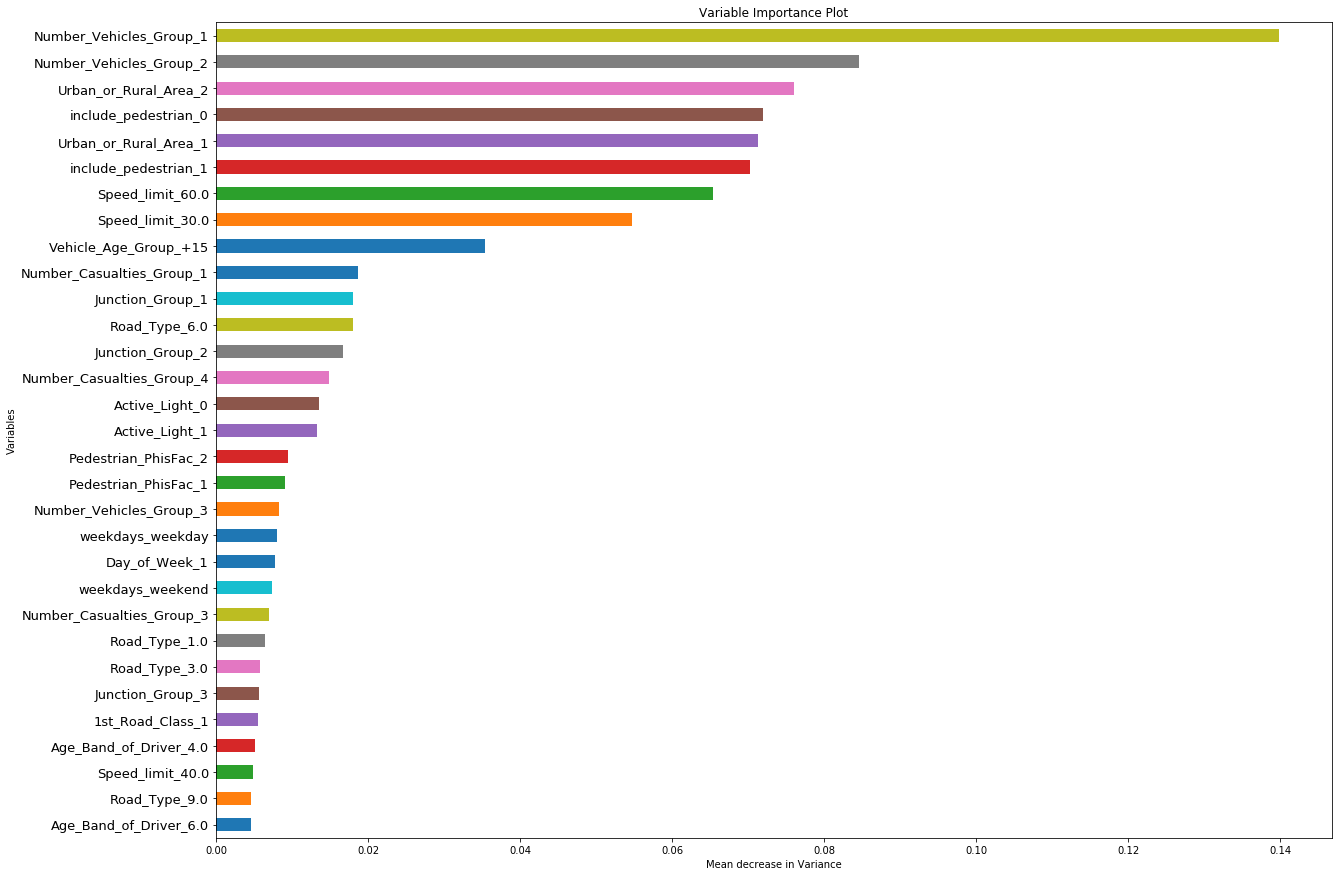

<Figure size 432x288 with 0 Axes>

In [102]:
# Plot of Variable importance by mean decrease in gini
model_ranks = pd.Series(rf_fit.feature_importances_,
                        index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False)
model_ranks.index.name = 'Variables'
top_features = model_ranks.iloc[:31].sort_values(ascending=True,inplace=False)
plt.figure(figsize=(20,15))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(top_features.index, fontsize=13)
plt.show()
plt.savefig('variable_importance_plot_round_2')